## EN2550: Assignment 03 on Object Counting on a Conveyor Belt

### Connected Component Analysis

#### Loading Images

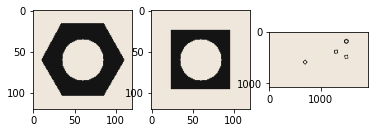

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

#### Otsu's Thresholding

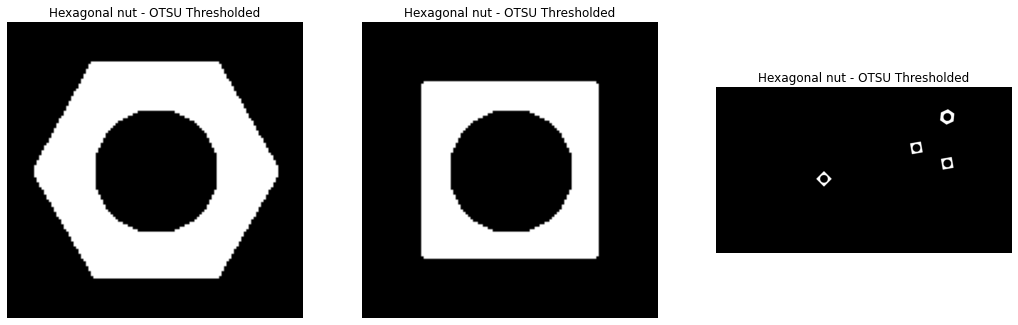

In [2]:
hexnut_template_gray = cv.cvtColor(hexnut_template, cv.COLOR_BGR2GRAY)
hexnut_template_blur = cv.GaussianBlur(hexnut_template_gray,(5,5),0) #Guassian filter is used to filter noise
ret3,hexnut_template_th = cv.threshold(hexnut_template_blur,0,255,cv.THRESH_BINARY_INV +cv.THRESH_OTSU) #Binary Inverse threshold is used to change the black parts of the nuts to white so that the contours and component statistics can be identified properly.

squarenut_template_gray = cv.cvtColor(squarenut_template, cv.COLOR_BGR2GRAY)
squarenut_template_blur = cv.GaussianBlur(squarenut_template_gray,(5,5),0)
ret3,squarenut_template_th = cv.threshold(squarenut_template_blur,0,255,cv.THRESH_BINARY_INV +cv.THRESH_OTSU)

conveyor_f100_gray = cv.cvtColor(conveyor_f100, cv.COLOR_BGR2GRAY)
conveyor_f100_blur = cv.GaussianBlur(conveyor_f100_gray,(5,5),0)
ret3,conveyor_f100_th = cv.threshold(conveyor_f100_blur,0,255,cv.THRESH_BINARY_INV +cv.THRESH_OTSU)

fig, ax = plt. subplots(1,3, figsize = (18,6))
ax[0].imshow(hexnut_template_th, 'gray')
ax[0].set_title('Hexagonal nut - OTSU Thresholded')
ax[0].axis('off')
ax[1].imshow(squarenut_template_th, 'gray')
ax[1].set_title('Hexagonal nut - OTSU Thresholded')
ax[1].axis('off')
ax[2].imshow(conveyor_f100_th, 'gray')
ax[2].set_title('Hexagonal nut - OTSU Thresholded')
ax[2].axis('off')
plt.show()

#### Morphological Closing

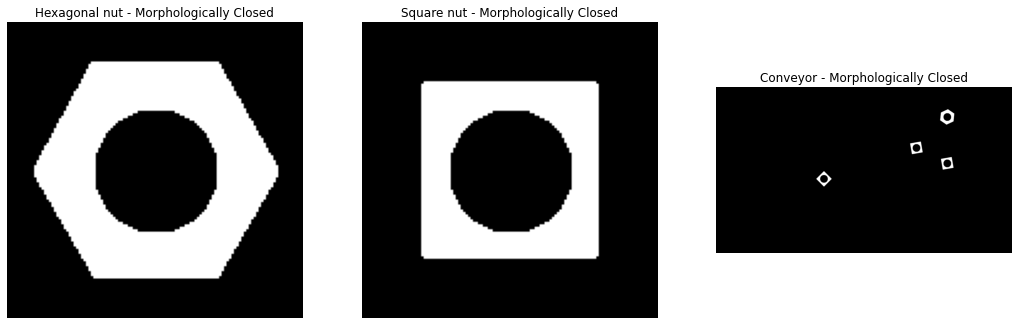

In [3]:
kernel = np.ones((3,3),np.uint8)

hexnut_template_closed = cv.morphologyEx(hexnut_template_th, cv.MORPH_CLOSE, kernel)
squarenut_template_closed = cv.morphologyEx(squarenut_template_th, cv.MORPH_CLOSE, kernel)
conveyor_f100_closed = cv.morphologyEx(conveyor_f100_th, cv.MORPH_CLOSE, kernel)

fig, ax = plt. subplots(1,3, figsize = (18,6))
ax[0].imshow(hexnut_template_closed, 'gray')
ax[0].set_title('Hexagonal nut - Morphologically Closed')
ax[0].axis('off')
ax[1].imshow(squarenut_template_closed, 'gray')
ax[1].set_title('Square nut - Morphologically Closed')
ax[1].axis('off')
ax[2].imshow(conveyor_f100_closed, 'gray')
ax[2].set_title('Conveyor - Morphologically Closed')
ax[2].axis('off')
plt.show()

#### Connected Component Analysis

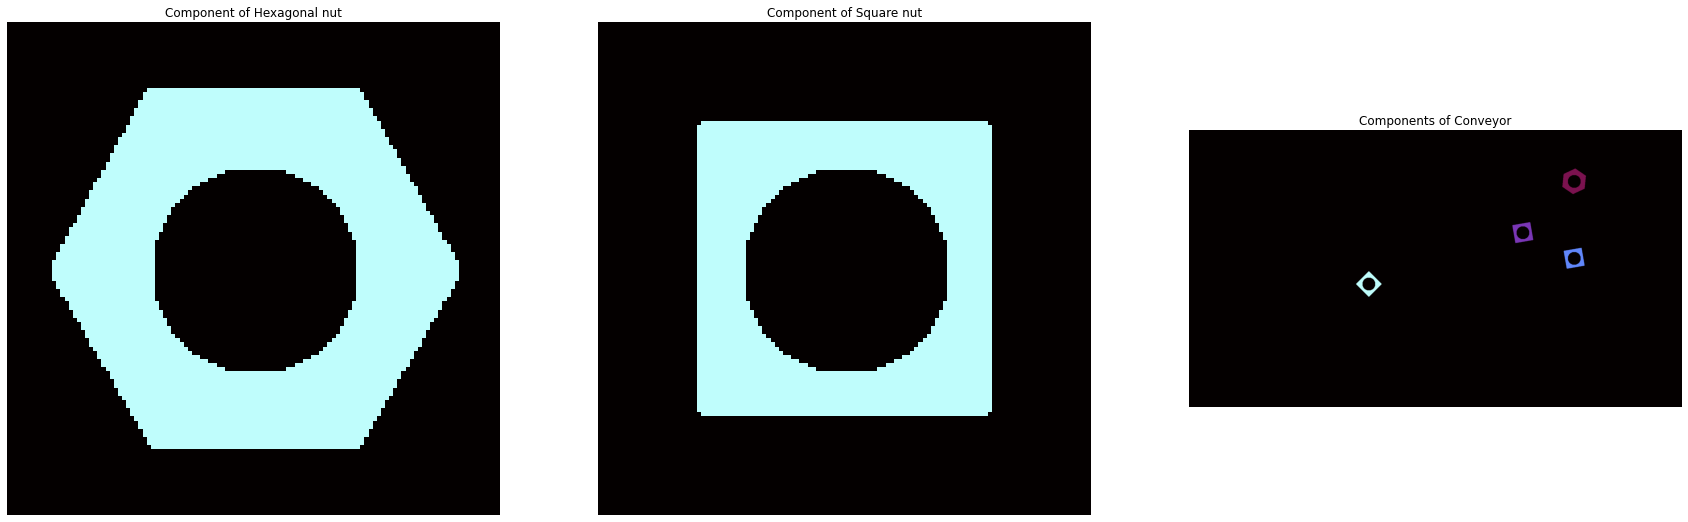

In [4]:
connectivity = 8
num_labels1, labelmap1, stats1, centroids1 = cv.connectedComponentsWithStats(hexnut_template_closed, connectivity)
colormapped1 = cv.applyColorMap((labelmap1/np.amax(labelmap1)*255).astype('uint8'), cv.COLORMAP_MAGMA) #Applying colormap

num_labels2, labelmap2, stats2, centroids2 = cv.connectedComponentsWithStats(squarenut_template_closed, connectivity)
colormapped2 = cv.applyColorMap((labelmap2/np.amax(labelmap2)*255).astype('uint8'), cv.COLORMAP_MAGMA)

num_labels3, labelmap3, stats3, centroids3 = cv.connectedComponentsWithStats(conveyor_f100_closed, connectivity)
colormapped3 = cv.applyColorMap((labelmap3/np.amax(labelmap3)*255).astype('uint8'), cv.COLORMAP_MAGMA)

fig, ax = plt. subplots(1,3, figsize=(30, 30))
ax[0].imshow(colormapped1)
ax[0].set_title('Component of Hexagonal nut')
ax[0].axis('off')
ax[1].imshow(colormapped2)
ax[1].set_title('Component of Square nut')
ax[1].axis('off')
ax[2].imshow(colormapped3)
ax[2].set_title('Components of Conveyor')
ax[2].axis('off')
plt.show()

##### Number of components
The num_labels variable provides the number of components identified in the image. The background of the image is also included as a component.

In [5]:
print('Number of components in hexagonal nut template image = ', num_labels1)
print('Number of components in square nut template image = ', num_labels2)
print('Number of components in the conveyor image = ', num_labels3)

Number of components in hexagonal nut template image =  2
Number of components in square nut template image =  2
Number of components in the conveyor image =  5


##### Statistics
Statistics provides the characteristics of each component in the image. It is a $n X 5$ numpy array where n is the number of components in the image including the background. The first 2 elements in each row are the starting x coordinate and starting y coordinate of the component respectively. The next 2 elements are the width and the height of the component. The last element provides the area of the component in pixels

In [67]:
#Hexagonal nut template image
for i in range(len(stats1)):
    print('Starting coordinates of Component', (i+1), ' = (',stats1[i,0], ',', stats1[i,1],')')
    print('Width of Component', (i+1), ' = ', stats1[i,2])
    print('Height of Component', (i+1), ' = ', stats1[i,3])
    print('Area of Component', (i+1), 'in pixels = ', stats1[i,4])

Starting coordinates of Component 1  = ( 0 , 0 )
Width of Component 1  =  120
Height of Component 1  =  120
Area of Component 1 in pixels =  9674
Starting coordinates of Component 2  = ( 11 , 16 )
Width of Component 2  =  99
Height of Component 2  =  88
Area of Component 2 in pixels =  4726


In [69]:
#Square nut template image
for i in range(len(stats2)):
    print('Starting coordinates of Component', (i+1), ' = (',stats2[i,0], ',', stats2[i,1],')')
    print('Width of Component', (i+1), ' = ', stats2[i,2])
    print('Height of Component', (i+1), ' = ', stats2[i,3])
    print('Area of Compnent', (i+1), 'in pixels = ', stats2[i,4])

Starting coordinates of Component 1  = ( 0 , 0 )
Width of Component 1  =  120
Height of Component 1  =  120
Area of Compnent 1 in pixels =  11177
Starting coordinates of Component 2  = ( 24 , 24 )
Width of Component 2  =  72
Height of Component 2  =  72
Area of Compnent 2 in pixels =  3223


In [70]:
#Conveyor image
for i in range(len(stats3)):
    print('Starting coordinates of Component', (i+1), ' = (',stats3[i,0], ',', stats3[i,1],')')
    print('Width of Component', (i+1), ' = ', stats3[i,2])
    print('Height of Component', (i+1), ' = ', stats3[i,3])
    print('Area of Component', (i+1), 'in pixels = ', stats3[i,4])

Starting coordinates of Component 1  = ( 0 , 0 )
Width of Component 1  =  1920
Height of Component 1  =  1080
Area of Component 1 in pixels =  2059658
Starting coordinates of Component 2  = ( 1454 , 150 )
Width of Component 2  =  92
Height of Component 2  =  100
Area of Component 2 in pixels =  4636
Starting coordinates of Component 3  = ( 1259 , 359 )
Width of Component 3  =  82
Height of Component 3  =  82
Area of Component 3 in pixels =  3083
Starting coordinates of Component 4  = ( 1459 , 459 )
Width of Component 4  =  82
Height of Component 4  =  82
Area of Component 4 in pixels =  3083
Starting coordinates of Component 5  = ( 651 , 551 )
Width of Component 5  =  99
Height of Component 5  =  99
Area of Component 5 in pixels =  3140


##### Centroids

In [62]:
print('Centroid of Hexagonal nut = (',centroids1[1,0], ',', centroids1[1,1],')')
print('Centroid of Square nut = (',centroids2[1,0], ',', centroids2[1,1],')')

for i in range(len(centroids3)):
    print('Centroid of Comoponent', (i+1), ' = (',centroids3[i,0], ',', centroids3[i,1],')')

Centroid of Hexagonal nut = ( 59.83368599238256 , 59.223233178163355 )
Centroid of Square nut = ( 59.196400868755816 , 59.196400868755816 )
Centroid of Comoponent 1  = ( 957.3644527392412 , 540.4439251565066 )
Centroid of Comoponent 2  = ( 1499.2420189818808 , 199.28515962036238 )
Centroid of Comoponent 3  = ( 1299.182614336685 , 399.18261433668505 )
Centroid of Comoponent 4  = ( 1499.182614336685 , 499.18261433668505 )
Centroid of Comoponent 5  = ( 700.0 , 600.0 )


#### Extreme Contours

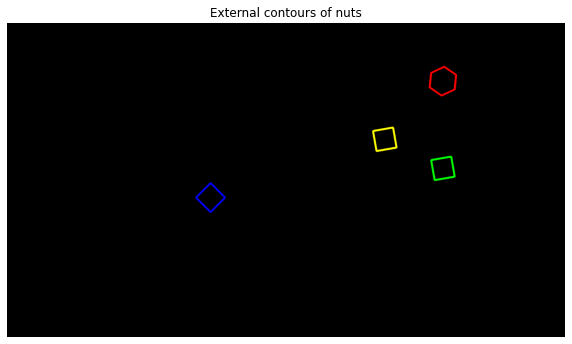

In [36]:
contours, hierarchy = cv.findContours(conveyor_f100_closed, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE) #External mode is used to identify only the external contours
plot_image = np.zeros_like(conveyor_f100)
#Applying different colors to different contours
cv.drawContours(plot_image, contours, 0, (0,0,255), 5)
cv.drawContours(plot_image, contours, 1, (0,255,0), 5)
cv.drawContours(plot_image, contours, 2, (255,255,0), 5)
cv.drawContours(plot_image, contours, 3, (255,0,0), 5)
fig, ax = plt. subplots(1,1, figsize=(10, 10))
ax.imshow(plot_image)
ax.set_title('External contours of nuts')
ax.axis('off')
plt.show()

### Detecting Objects on a Synthetic Conveyor

In [7]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.


#### Number of Matching Hexagonal and Square Nuts 

In [8]:

hexcontours, hexhierarchy = cv.findContours(hexnut_template_closed, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
squarecontours, squarehierarchy = cv.findContours(squarenut_template_closed, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contours, hierarchy = cv.findContours(conveyor_f100_closed, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

count1 = 0
count2 = 0
for contour in contours:
    diff1 = cv.matchShapes(hexcontours[0], contour, 1, 0.0)
    diff2 = cv.matchShapes(squarecontours[0], contour, 1, 0.0)
    if diff1 < 0.001:
        count1 += 1
    elif diff2 < 0.001:
        count2 += 1
print('Number of Hexagonal nuts = ', count1)
print('Number of square nuts = ', count2)

Number of Hexagonal nuts =  1
Number of square nuts =  3


#### Finding the Number of Hexagonal and Squarenuts in a Frame of a Video

In [48]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
hexcontours, hexhierarchy = cv.findContours(hexnut_template_closed, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
squarecontours, squarehierarchy = cv.findContours(squarenut_template_closed, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
f = 0
frame_array = []
hexagonal_total = 0
square_total = 0 
previous_maximum_x_coordinate = 0

while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Identified all objects in the video!!.")
        break
    frame_hex_count = 0 #no of hexagonal nuts in the current frame
    frame_square_count = 0 #no of square nuts in the current frame
    frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY) 
    frame_blur = cv.GaussianBlur(frame_gray,(5,5),0)
    ret3,frame_th = cv.threshold(frame_blur,0,255,cv.THRESH_BINARY_INV + cv.THRESH_OTSU) #OTSU Thresholding
    kernel = np.ones((3,3),np.uint8) 
    frame_closed = cv.morphologyEx(frame_th, cv.MORPH_CLOSE, kernel) #Morphological closing
    connectivity = 8
    num_labels, labelmap, stats, centroids = cv.connectedComponentsWithStats(frame_closed, connectivity)
    frame_contours, frame_hierarchy = cv.findContours(frame_closed, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    
    for contour in frame_contours: #Detecting the hexagonal and square nuts in the current frame
        diff1 = cv.matchShapes(hexcontours[0], contour, 1, 0.0)
        diff2 = cv.matchShapes(squarecontours[0], contour, 1, 0.0)
        if diff1 < 0.001:
            frame_hex_count += 1
            
        elif diff2 < 0.001:
            frame_square_count += 1

    x_coordinates = centroids[1:, 0] #Getting the x coordinates of the centroids of the components except the background
    maximum_x_coordinate = np.floor(np.max(x_coordinates[x_coordinates <= 1875])) #Finding the maximum x-coordinate which denotes the new arrival of a nut.
    maximum_position = np.where(np.floor(x_coordinates) == maximum_x_coordinate)  #Finding the position of the new nut in the centroid array
    if maximum_x_coordinate >= previous_maximum_x_coordinate: #Checking for the global maximum 
        previous_maximum_x_coordinate = maximum_x_coordinate
        for m in maximum_position[0]: 
            Area = stats[int(m)+1, 4]
            #Identifying the new nut either as a hxagonal nut or a square nut
            if 4000 < Area < 5000:
                hexagonal_total += 1
            if 3000 < Area < 4000:
                square_total += 1
            
    f += 1
    #Adding texts to the video
    frame_text = 'Frame:' + str(f)
    hex_text = 'Number of Hexagonal nuts in the current frame:' + str(frame_hex_count)
    square_text = 'Number of Square nuts in the current frame:' + str(frame_square_count)
    total_hex_text = 'Total number of Hexagonal nuts:' + str(hexagonal_total)
    total_square_text = 'Total number of Square nuts:' + str(square_total)
    total_text = 'Total number of Objects conveyed in the belt:' + str(hexagonal_total+square_total)
    cv.putText(frame,frame_text , (100, 50), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.putText(frame,hex_text , (100, 80), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.putText(frame,square_text , (100, 110), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.putText(frame,total_hex_text , (100, 140), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.putText(frame,total_square_text , (100, 170), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.putText(frame,total_text , (100, 200), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)
    frame_array.append(frame)
    
    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()
shape = (1080, 1920, 3)
out = cv.VideoWriter('./conveyor_result_190621M.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))
#Writing the frames to the video.
for i in range(len(frame_array)):
    if cv.waitKey(1) == ord('q'):
        break
    out.write(frame_array[i])

out.release()
cv.destroyAllWindows()

Identified all objects in the video!!.
